In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img, cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
corn_flakes = cv2.imread("C:/Users/GUNGUN PANDEY/OneDrive/Desktop/rgb/corn_flakes.jpg")

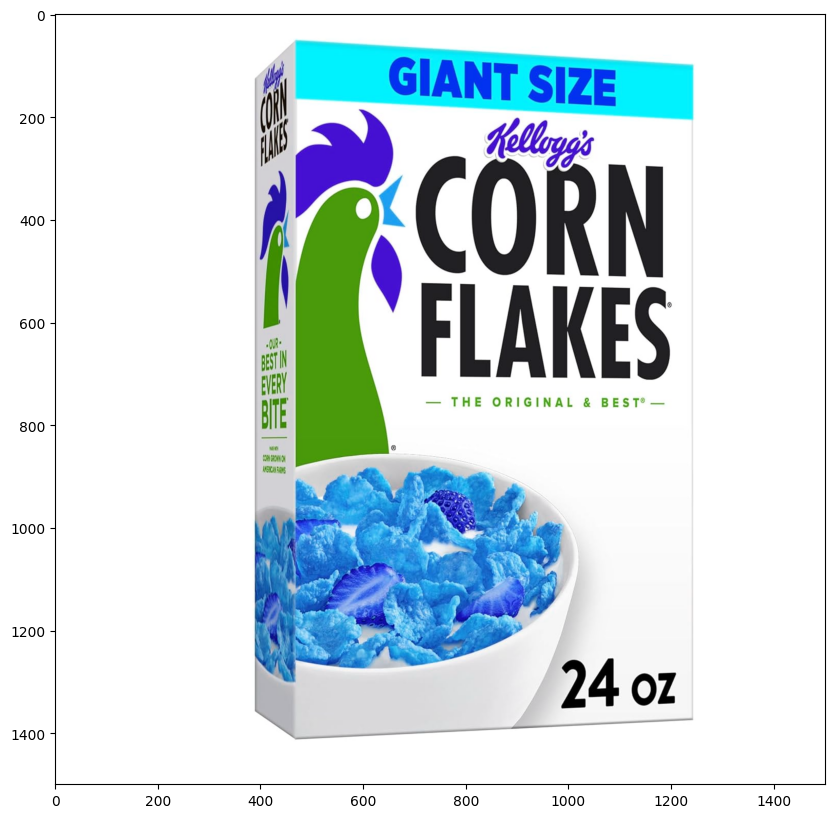

In [5]:
display(corn_flakes)

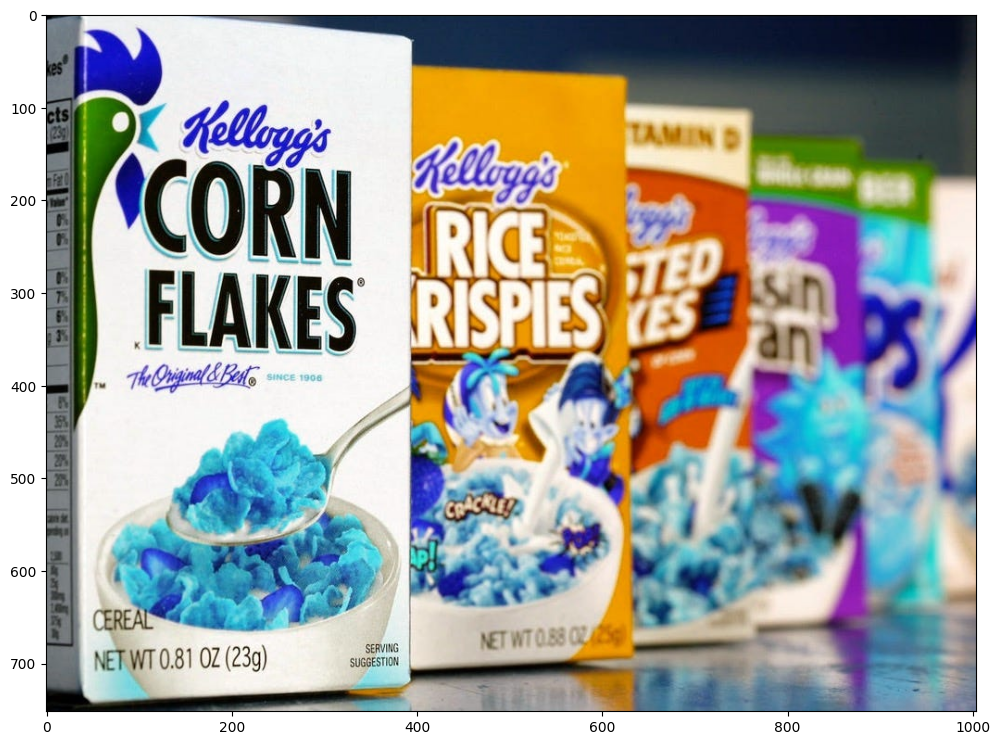

In [7]:
cereals = cv2.imread("C:/Users/GUNGUN PANDEY/OneDrive/Desktop/rgb/cereal_boxes.jpg")
display(cereals)

In [8]:
#Brute Froce Detection with ORB detectors
orb = cv2.ORB_create()

In [9]:
kp1, des1 = orb.detectAndCompute(corn_flakes,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [10]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [11]:
matches = bf.match(des1,des2)

In [15]:
single_match = matches[0]
single_match.distance #the less distance the more better of a match

35.0

In [16]:
#Sorting the matches accordnig to the distances
matches = sorted(matches, key=lambda x:x.distance)

In [21]:
corn_flakes_matches = cv2.drawMatches(corn_flakes, kp1, cereals, 
                                      kp2, matches[:25], None, flags = 2)

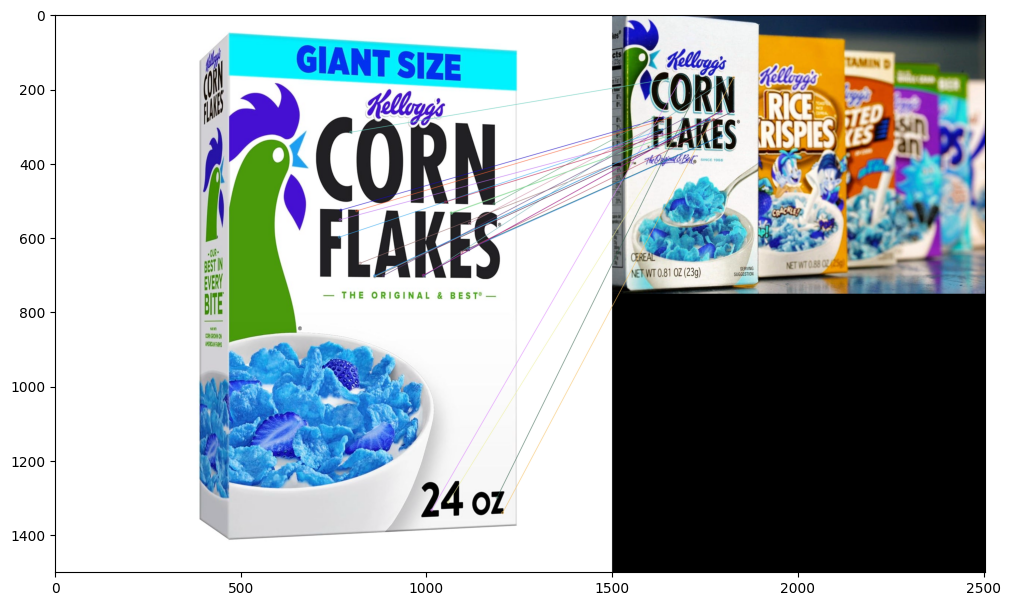

In [19]:
display(corn_flakes_matches)

In [23]:
#SIFT(cale-invariant feature transform) detector
sift = cv2.xfeatures2d.SIFT_create()

In [24]:
kp1, des1 = sift.detectAndCompute(corn_flakes, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [25]:
bf = cv2.BFMatcher()

In [26]:
matches = bf.knnMatch(des1,des2,k=2)

In [28]:
#Applying a ratio test
good = []

for match1, match2 in matches:
    #If match 1 distance is less than 75% if match 2 distance then descriptor was a good match.
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [29]:
len(good)

189

In [30]:
len(matches)

3995

In [32]:
sift_matches = cv2.drawMatchesKnn(corn_flakes, kp1, cereals, kp2, good, None, flags = 2)

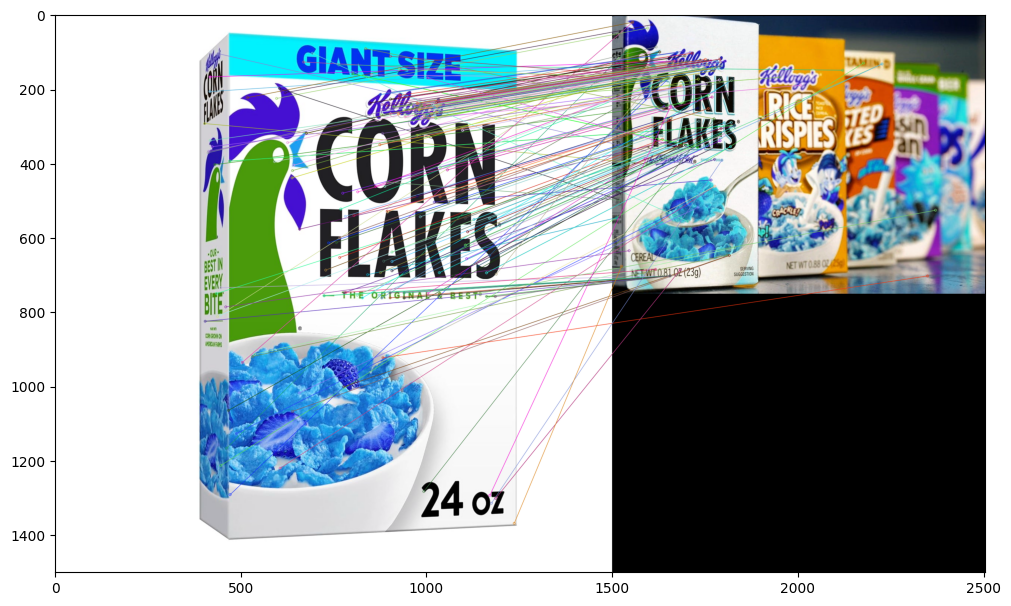

In [33]:
display(sift_matches)

In [34]:
#FLANN(Fast Library for Approximate Nearest Neighbors) based matcher
sift = cv2.xfeatures2d.SIFT_create()

In [35]:
kp1, des1 = sift.detectAndCompute(corn_flakes, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [36]:
FLANN_INDEX_KDTREE = 0
index_parmas = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

In [37]:
flann = cv2.FlannBasedMatcher(index_parmas,search_params)

In [47]:
matches = flann.knnMatch(des1,des2,k=2)

In [48]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [49]:
flann_matches = cv2.drawMatchesKnn(corn_flakes, kp1, cereals, kp2, good, None, flags = 2)

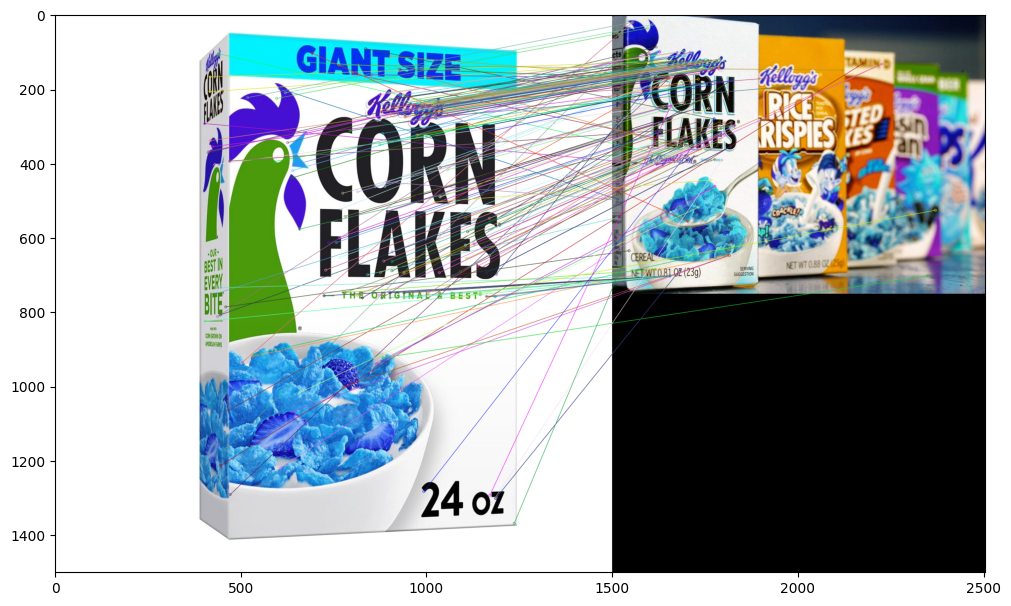

In [50]:
display(flann_matches)